In [2]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from manufacturing_company.src.common.const import *
from manufacturing_company.src.classification_algorithms.standard_classification import *
from manufacturing_company.src.logs.standard_classification_logger import StandardClassificationLogger
from manufacturing_company.src.visualization.plot_standard_classification import PlotStandardClassification
from manufacturing_company.src.visualization.random_baseline_mc import *

import warnings
warnings.filterwarnings(action='once')


/Users/mateusz/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
positions = pd.read_csv(MC_FILE_POSITIONS, sep=';', comment='#', index_col=ID)

levels = 3

In [15]:
def decision_tree_params(n_features):
    max_depth = np.linspace(1, 20, 20, endpoint=True)
    max_features = list(range(1, n_features))
    return {'model__max_depth': max_depth, 'model__max_features': max_features}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


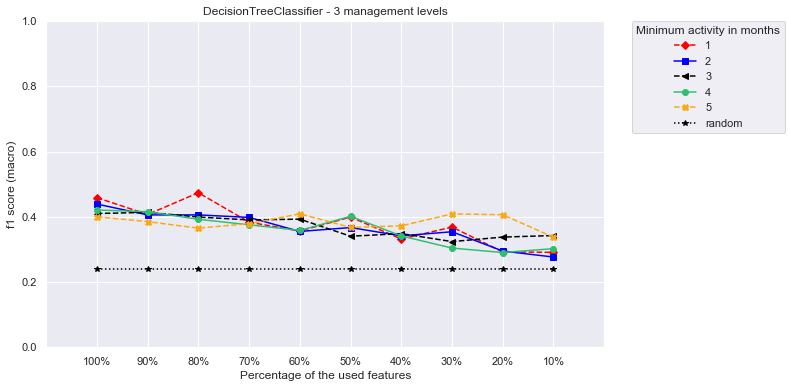

In [16]:
# DECISION TREE

logger = StandardClassificationLogger('manufacturing_company', levels, DecisionTreeClassifier)

for month in MONTHS:
    features = pd.read_csv(MC_FILE_FEATURES.format(month), sep=';', index_col=ID)
    features = assign_management_levels_mc(levels, features, positions)

    models = classification(features, DecisionTreeClassifier, decision_tree_params, 'f1_macro', logger, month)
    

plot = PlotStandardClassification(logger.directory_path, DecisionTreeClassifier, levels, random_baseline_mc)
plot.plot()


In [4]:
def random_forest_params(n_features):
    n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
    max_depth = np.linspace(1, 20, 20, endpoint=True)
    max_features = list(range(1, n_features))
    return {'model__n_estimators': n_estimators, 
            'model__max_depth': max_depth, 
            'model__max_features': max_features}


In [5]:
# RANDOM FOREST

logger = StandardClassificationLogger('manufacturing_company', levels, RandomForestClassifier)

for month in MONTHS:
    features = pd.read_csv(MC_FILE_FEATURES.format(month), sep=';', index_col=ID)
    features = assign_management_levels_mc(levels, features, positions)

    models = classification(features, RandomForestClassifier, random_forest_params, 'f1_macro', logger, month)

plot = PlotStandardClassification(logger.directory_path, RandomForestClassifier, levels, random_baseline_mc)
plot.plot()
